In [8]:
import torch
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib
import pandas as pd

In [9]:
import numpy as np
from sklearn.manifold import TSNE
import copy

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# % matplotlib inline

# keys = ['1,2,3,4,5,6,7']
def tsne_plot_2d(label, embeddings,title,anchor_xy, color = None,words=[],show_legend=True,save_fig=True, a=0.7,col=1):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    x = embeddings[:,0]
    y = embeddings[:,1]
    cmap = matplotlib.cm.get_cmap('coolwarm')
    colors = cm.rainbow(np.linspace(0, 1, len(y)))
    if color is None:
        c1 = (x - np.min(x)+0.1)/(np.max(x) - np.min(x))
        c2 = (y - np.min(y))/(np.max(y) - np.min(y))
        c = (c1+c2)/2
    else:
        c = color
    # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], alpha=a,color=cmap(c[i]), label=label[i],s=80)
    if(show_legend==True):
        plt.legend(bbox_to_anchor=(anchor_xy[0], anchor_xy[1]),ncol=col)
    plt.grid(True)
    if(save_fig ==True):
        plt.savefig(title+'.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.show()
    return c

# tsne_plot_2d('Anna Karenina by Leo Tolstoy', embeddings_ak_2d, a=0.1)

In [11]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import copy
import warnings
# task_embedding = torch.load('task_embedding_chembl.pth').cpu().detach().numpy()
warnings.filterwarnings("ignore")

# X = copy.deepcopy(task_embedding).astype(np.float64)
# # X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# X_embedded = TSNE(n_components=2, init='random').fit_transform(X)

In [12]:
import pickle
dataset = '27tasksaddpair'
embedding_list = np.load('./embedding_collect/'+ dataset +'_encoder_output_list_sd.npy',allow_pickle=True)
train_visual = embedding_list[-1]
test_visual = embedding_list[-2]
all_comb = np.concatenate((train_visual,test_visual),axis=0)
with open('./log/27tasksaddpair/pred_pertask_trajactiveper.pkl', "rb") as fp:
    pred_traj = pickle.load(fp)
with open('./log/27tasksaddpair/mask_pertask_trajactiveper.pkl', "rb") as fp:
    mask_traj = pickle.load(fp)
perf = pred_traj[-1]
mask = mask_traj[-1]
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
perf=perf[new_index]
for i in range(len(perf[0])):
    print(i,len(np.where(perf[:,i]>0)[0]),len(np.where(perf[:,i]<0)[0]))

0 22 1448
1 17 1406
2 98 1331
3 13 1401
4 11 1408
5 18 1349
6 32 1404
7 36 1369
8 12 1389
9 11 1453
10 2 1386
11 21 1429
12 1435 5
13 36 1399
14 1281 191
15 17 1378
16 32 1386
17 1255 159
18 1289 183
19 1387 58
20 1384 55
21 42 1372
22 1393 65
23 1390 28
24 184 1226
25 1347 33
26 1411 4


In [13]:
perf = pd.read_csv('./gain_data/3000addpair/27tasksHOA_clean.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/3000addpair/27tasks_validx_clean.csv',sep=' ',header=None).values
visual_mask = np.zeros(all_comb.sum(2).shape)

In [14]:
perf = pd.read_csv('./gain_data/3000addpair/27tasksTAGHOA_clean.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/3000addpair/27tasks_validx_clean.csv',sep=' ',header=None).values
visual_mask = np.zeros(all_comb.sum(2).shape)

In [15]:
perf = pd.read_csv('./gain_data/3000addpair/27tasks_validy_clean.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/3000addpair/27tasks_validx_clean.csv',sep=' ',header=None).values

In [16]:
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1

In [17]:
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
perf=perf[new_index]

In [19]:
all_task = [ 'icd infection', 'icd neoplasms', 'icd endocrine', 'icd blood', 'icd mental', 'icd nervous',
         'icd circulatory', 'icd respiratory', 'icd digestive', 'icd genitourinary', 'icd pregnancy',
         'icd skin', 'icd musculoskeletal', 'icd congenital', 'icd ill-defined','icd injury', 'dis 24h', 'dis 48h', 'mor 24h', 'mor 48h',
         'LOS', 'REA', 'ACU',  'dnr_24h', 'dnr_48h', 'cmo_24h', 'cmo_48h']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


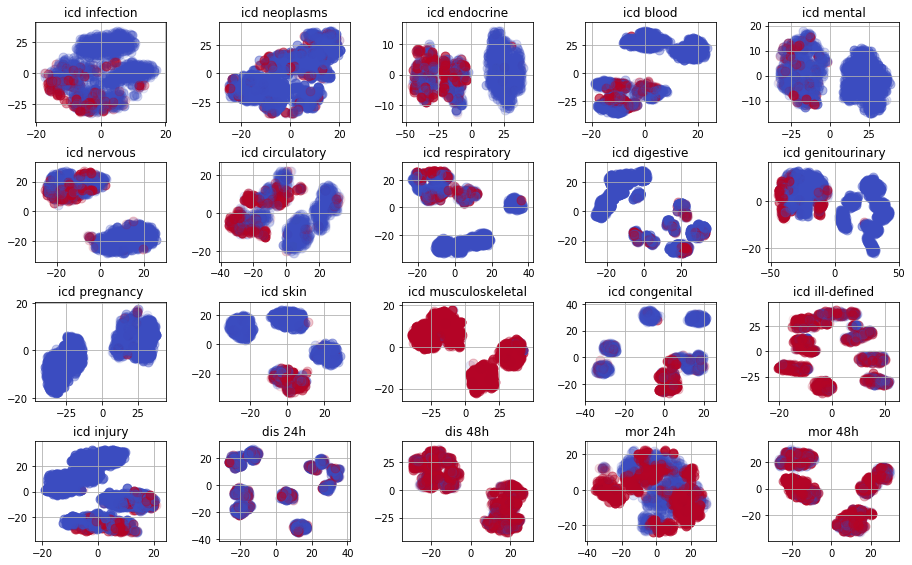

In [21]:
import copy
_perf = copy.deepcopy(perf)
fig = plt.figure(figsize=(15,9))
figure_idx = 1
select_task_idx = 2
with_task_idx = 10
for select_task_idx in range(20):
    print(select_task_idx)
    for tmp in [75,]:
        plt.subplot(4,5,figure_idx)
        a = 0.7
        figure_idx = figure_idx + 1
        _perf = copy.deepcopy(perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        selected_comb = all_comb[sel_idx]
        _perf = _perf[sel_idx]
        _a = copy.deepcopy(_perf[:,select_task_idx])
        X = selected_comb[:,select_task_idx,:]
        _perf = _perf[:,select_task_idx]
        perf_max,perf_min = np.max(_perf), np.min(_perf)
        for i in range(len(_perf)):
            if(_perf[i]>0):
                _perf[i] = 1
                _a[i] = _a[i]/(perf_max+0.00001)
            else:
                _perf[i] = -0.5
                _a[i] = _a[i]/(perf_min-0.00001) + 0.1
            if(_a[i]>0.99):
                _a[i] = 1
        # _perf = (_perf-np.min(_perf))/(np.max(_perf)-np.min(_perf))
        # X = all_comb[np.where(all_comb[:,with_task_idx,:].sum(1)!=0)]
        X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
        keys = list(range(len(X)))
        title = all_task[select_task_idx]
        color=_perf
        embeddings = X_embedded
        label = keys
        plt.title(title)
        x = embeddings[:,0]
        y = embeddings[:,1]
        cmap = matplotlib.cm.get_cmap('coolwarm')
        c = color
        # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
        plt.grid(True)
        for i in range(len(x)):
            plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(c[i]), label=label[i],s=80)
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
plt.savefig('mimic27_embedding_1-20.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
    # task_embedd_c =tsne_plot_2d(keys,X_embedded,title='Task Representation, MIMIC-27 Task '+str(select_task_idx),color=_perf,show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)

In [ ]:
import copy
_perf = copy.deepcopy(perf)
# 27 8
# plt.figure(figsize=(40, 120))
# # 3 9
# plt.figure(figsize=(45, 15))
plt.figure(figsize=(21,2.2))
figure_idx = 1
# 13可以用
select_task_idx = 2
with_task_idx = 10
for select_task_idx in range(20,27):
    print(select_task_idx)
    for tmp in [75,]:
        plt.subplot(1,7,figure_idx)
        a = 0.7
        figure_idx = figure_idx + 1
        _perf = copy.deepcopy(perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        selected_comb = all_comb[sel_idx]
        _perf = _perf[sel_idx]
        _a = copy.deepcopy(_perf[:,select_task_idx])
        X = selected_comb[:,select_task_idx,:]
        _perf = _perf[:,select_task_idx]
        perf_max,perf_min = np.max(_perf), np.min(_perf)
        for i in range(len(_perf)):
            if(_perf[i]>0):
                _perf[i] = 1
                _a[i] = _a[i]/(perf_max+0.00001)
            else:
                _perf[i] = -0.5
                _a[i] = _a[i]/(perf_min-0.00001) + 0.1
            if(_a[i]>0.99):
                _a[i] = 1
        # _perf = (_perf-np.min(_perf))/(np.max(_perf)-np.min(_perf))
        # X = all_comb[np.where(all_comb[:,with_task_idx,:].sum(1)!=0)]
        X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
        keys = list(range(len(X)))
        title = all_task[select_task_idx]
        color=_perf
        embeddings = X_embedded
        label = keys
        plt.title(title)
        x = embeddings[:,0]
        y = embeddings[:,1]
        cmap = matplotlib.cm.get_cmap('coolwarm')
        c = color
        # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
        plt.grid(True)
        for i in range(len(x)):
            plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(c[i]), label=label[i],s=80)
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
plt.savefig('mimic27_embedding_21-27.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()